# Classical Machine Learning Approach

In this notebook classical machine learning methods are used to predict smoking status based on clinical and biological features. The focus is on comparing basic classifiers and optimizing their performance through data preprocessing, handling class imbalance and hyperparameter tuning.

### Classifiers

Several standard classifiers are trained with default settings to establish baseline performance:

* Logistic Regression – a linear model for binary classification,
* Random Forest – an ensemble of decision trees using bagging,
* Linear SVM – a support vector machine with a linear kernel,
* XGBoost – a gradient boosting decision tree model.

### Experiments

The notebook explores:

1. training baseline classifiers on original, oversampled and undersampled datasets,
2. evaluating models using accuracy, F1-score and ROC AUC,
3. hyperparameter tuning of the best-performing classifier to improve predictive performance.

The ultimate goal is to determine which classical machine learning model and configuration deliver the highest predictive performance for smoking status.

## Preprocessing

The file `smoking.csv`. is loaded into a DataFrame, allowing the dataset to be accessed and processed

In [1]:
import pandas as pd
df = pd.read_csv('smoking.csv')

### One-hot encoding

Categorical columns `gender`, `oral`, `tartar` are converted into numerical format using one-hot encoding. The first category in each column is dropped to avoid multicollinearity. The resulting encoded columns are then merged back into the original DataFrame, replacing the original categorical columns.

In [2]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df[['gender', 'oral', 'tartar']])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender', 'oral', 'tartar']))

df.drop(['gender', 'oral', 'tartar'], axis=1, inplace=True)
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

print(df.columns)

Index(['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking', 'gender_M', 'tartar_Y'],
      dtype='object')


### Delete outliers

Numeric features (excluding `ID` and `smoking`) are standardized. Rows with any value more than 3 standard deviations from the mean are considered outliers and removed. The filtered DataFrame `df_filtered` contains only the rows within this threshold.

In [3]:
import numpy as np

z_scores = np.abs((df['age'] - df['age'].mean()) / df['age'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['weight(kg)'] - df['weight(kg)'].mean()) / df['weight(kg)'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['height(cm)'] - df['height(cm)'].mean()) / df['height(cm)'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['waist(cm)'] - df['waist(cm)'].mean()) / df['waist(cm)'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['eyesight(left)'] - df['eyesight(left)'].mean()) / df['eyesight(left)'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['eyesight(right)'] - df['eyesight(right)'].mean()) / df['eyesight(right)'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['hearing(left)'] - df['hearing(left)'].mean()) / df['hearing(left)'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['hearing(right)'] - df['hearing(right)'].mean()) / df['hearing(right)'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['systolic'] - df['systolic'].mean()) / df['systolic'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['relaxation'] - df['relaxation'].mean()) / df['relaxation'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['fasting blood sugar'] - df['fasting blood sugar'].mean()) / df['fasting blood sugar'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['Cholesterol'] - df['Cholesterol'].mean()) / df['Cholesterol'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['triglyceride'] - df['triglyceride'].mean()) / df['triglyceride'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['HDL'] - df['HDL'].mean()) / df['HDL'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['LDL'] - df['LDL'].mean()) / df['LDL'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['hemoglobin'] - df['hemoglobin'].mean()) / df['hemoglobin'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['Urine protein'] - df['Urine protein'].mean()) / df['Urine protein'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['serum creatinine'] - df['serum creatinine'].mean()) / df['serum creatinine'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['AST'] - df['AST'].mean()) / df['AST'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['ALT'] - df['ALT'].mean()) / df['ALT'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['Gtp'] - df['Gtp'].mean()) / df['Gtp'].std())
df_filtered = df[z_scores <= 3]


print("Num of rows before filtration:", len(df))
print("Num of rows after filtration:", len(df_filtered))

Num of rows before filtration: 55692
Num of rows after filtration: 54787


## Oversampling

Oversampling is applied to balance the target classes. The features and labels are separated, and the `RandomOverSampler` duplicates samples from the minority class to equalize the class distribution.

In [4]:
from imblearn.over_sampling import RandomOverSampler

X = df_filtered.drop('smoking', axis=1)
y = df_filtered['smoking']

over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X, y)

The oversampled features and labels are combined back into a single DataFrame.

In [5]:
df_oversampled = pd.concat([pd.DataFrame(X_over, columns=X.columns), y_over.reset_index(drop=True)], axis=1)

## Undersampling

Undersampling is performed using the NearMiss method, which reduces the majority class by selecting samples closest to the minority class.

In [6]:
from imblearn.under_sampling import NearMiss

under_sampler = NearMiss()
X_under, y_under = under_sampler.fit_resample(X, y)

In [7]:
df_undersampled = pd.concat([pd.DataFrame(X_under, columns=X.columns), y_under.reset_index(drop=True)], axis=1)

## Scaling and partitioning into sets

A standard scaler and train–test split configuration are prepared. The scaler will normalize numerical features, while the constants define the test set size and the random seed used for reproducible data splitting.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
TEST_SIZE = 0.2
RANDOM_STATE = 42

The dataset is prepared for model training by separating features and labels, removing the `ID` column and scaling numerical features. Each dataset variant: original, oversampled, and undersampled is split into training and testing sets with stratification to preserve the class distribution.

In [9]:
# Original data
X_orig = df_filtered.drop(['smoking', 'ID'], axis=1)
y_orig = df_filtered['smoking']
X_orig_scaled = scaler.fit_transform(X_orig)
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(
    X_orig_scaled, y_orig, test_size=TEST_SIZE, stratify=y_orig, random_state=RANDOM_STATE
)

# Oversampled
X_over_scaled = scaler.fit_transform(df_oversampled.drop(['smoking', 'ID'], axis=1))
y_over = df_oversampled['smoking']
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(
    X_over_scaled, y_over, test_size=TEST_SIZE, stratify=y_over, random_state=RANDOM_STATE
)

# Undersampled
X_under_scaled = scaler.fit_transform(df_undersampled.drop(['smoking', 'ID'], axis=1))
y_under = df_undersampled['smoking']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(
    X_under_scaled, y_under, test_size=TEST_SIZE, stratify=y_under, random_state=RANDOM_STATE
)

A helper function is defined to return the training and testing sets for a specified dataset type.

In [10]:
def get_dataset(kind='over'):
    """Returns (X_train, X_test, y_train, y_test) for the given data type"""
    if kind == 'over':
        return X_over_train, X_over_test, y_over_train, y_over_test
    elif kind == 'under':
        return X_under_train, X_under_test, y_under_train, y_under_test
    else:
        return X_orig_train, X_orig_test, y_orig_train, y_orig_test

# Model training  

Required machine learning models, metrics and utilities for hyperparameter tuning are imported. An attempt is made to import XGBoost, with a flag set to indicate whether it is available for use.

In [11]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

try:
    from xgboost import XGBClassifier
    XGB_AVAILABLE = True
except:
    XGB_AVAILABLE = False

A function is defined to evaluate a trained model on test data. It calculates three metrics: accuracy, F1-score and ROC AUC using predicted labels and probabilities.

In [12]:
def evaluate(model, X_test, y_test):
    pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)[:, 1]
    else:
        proba = model.decision_function(X_test)

    return {
        "accuracy": accuracy_score(y_test, pred),
        "f1": f1_score(y_test, pred),
        "roc_auc": roc_auc_score(y_test, proba)
    }

## Training

A function is defined to train several basic classifiers with their default settings. The models included are:

* Logistic Regression – a linear model for binary classification,
* Random Forest – an ensemble of decision trees using bagging,
* Linear SVM – a support vector machine with a linear kernel,
* XGBoost – a gradient boosting tree-based model.

For a given dataset type `orig`, `over` or `under` the function performs the following steps:

1. Retrieves the corresponding training and testing sets,
2. Trains each classifier on the training data,
3. Evaluates performance on the test set using accuracy, F1-score and ROC AUC.

In [13]:
from tqdm.notebook import tqdm

def train_all_models(kind="orig"):
    X_train, X_test, y_train, y_test = get_dataset(kind)
    results = {}
    total_models = 3 + int(XGB_AVAILABLE)
    pbar = tqdm(total=total_models, ncols=100, desc=f"Training models ({kind})")

    # Logistic Regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    results["Logistic Regression"] = evaluate(log_reg, X_test, y_test)
    pbar.update(1)

    # Random Forest
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    results["Random Forest"] = evaluate(rf, X_test, y_test)
    pbar.update(1)

    # SVM
    svm = LinearSVC()
    svm.fit(X_train, y_train)
    results["SVM"] = evaluate(svm, X_test, y_test)
    pbar.update(1)

    # XGBoost
    if XGB_AVAILABLE:
        xgb = XGBClassifier()
        xgb.fit(X_train, y_train)
        results["XGBoost"] = evaluate(xgb, X_test, y_test)
        pbar.update(1)

    pbar.close()
    return pd.DataFrame(results).T

The previously defined function is used to train all basic classifiers on three dataset variants: original, oversampled and undersampled.

In [14]:
results_orig = train_all_models("orig")
results_orig["dataset"] = "orig"

results_over = train_all_models("over")
results_over["dataset"] = "over"

results_under = train_all_models("under")
results_under["dataset"] = "under"


print("ORIGINAL")
display(results_orig)

print("OVERSAMPLED")
display(results_over)

print("UNDERSAMPLED")
display(results_under)

Training models (orig):   0%|                                                 | 0/4 [00:00<?, ?it/s]

Training models (over):   0%|                                                 | 0/4 [00:00<?, ?it/s]

Training models (under):   0%|                                                | 0/4 [00:00<?, ?it/s]

ORIGINAL


,accuracy,f1,roc_auc,dataset
Logistic Regression,0.749863,0.659799,0.833708,orig
Random Forest,0.830535,0.766914,0.913773,orig
SVM,0.750137,0.666260,0.833224,orig
XGBoost,0.773408,0.689431,0.860507,orig


OVERSAMPLED


,accuracy,f1,roc_auc,dataset
Logistic Regression,0.766876,0.794943,0.832627,over
Random Forest,0.882151,0.888664,0.968473,over
SVM,0.765303,0.799805,0.831963,over
XGBoost,0.812357,0.825625,0.890856,over


UNDERSAMPLED


,accuracy,f1,roc_auc,dataset
Logistic Regression,0.772693,0.783475,0.865118,under
Random Forest,0.844806,0.851883,0.932751,under
SVM,0.774206,0.790698,0.865174,under
XGBoost,0.810893,0.814906,0.900006,under


The model performances vary across dataset variants:

* in original dataset Random Forest achieves the highest F1-score and ROC AUC, while Logistic Regression and SVM perform similarly with lower scores,
* in oversampled dataset all models improve in F1-score, with Random Forest showing the best overall performance,
* in undersampled dataset performance is slightly lower than oversampling but higher than the original for most models. Random Forest still leads, while Logistic Regression and SVM show similar F1-scores.

The results will be displayed in a single table.

In [15]:
results_all = pd.concat([results_orig, results_over, results_under])
display(results_all)

,accuracy,f1,roc_auc,dataset
Logistic Regression,0.749863,0.659799,0.833708,orig
Random Forest,0.830535,0.766914,0.913773,orig
SVM,0.750137,0.666260,0.833224,orig
XGBoost,0.773408,0.689431,0.860507,orig
Logistic Regression,0.766876,0.794943,0.832627,over
Random Forest,0.882151,0.888664,0.968473,over
SVM,0.765303,0.799805,0.831963,over
XGBoost,0.812357,0.825625,0.890856,over
Logistic Regression,0.772693,0.783475,0.865118,under
Random Forest,0.844806,0.851883,0.932751,under


The best model is Random Forest trained on the oversampled dataset. It achieves the highest F1-score and ROC AUC in combination with oversampling.

### Visualizations

The results from all datasets are prepared for visualization.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = results_all.reset_index().rename(columns={"index": "model"})

Bar plots are created to compare the performance of all models across the three datasets. Each subplot shows a different metric—accuracy, F1-score and ROC AUC.

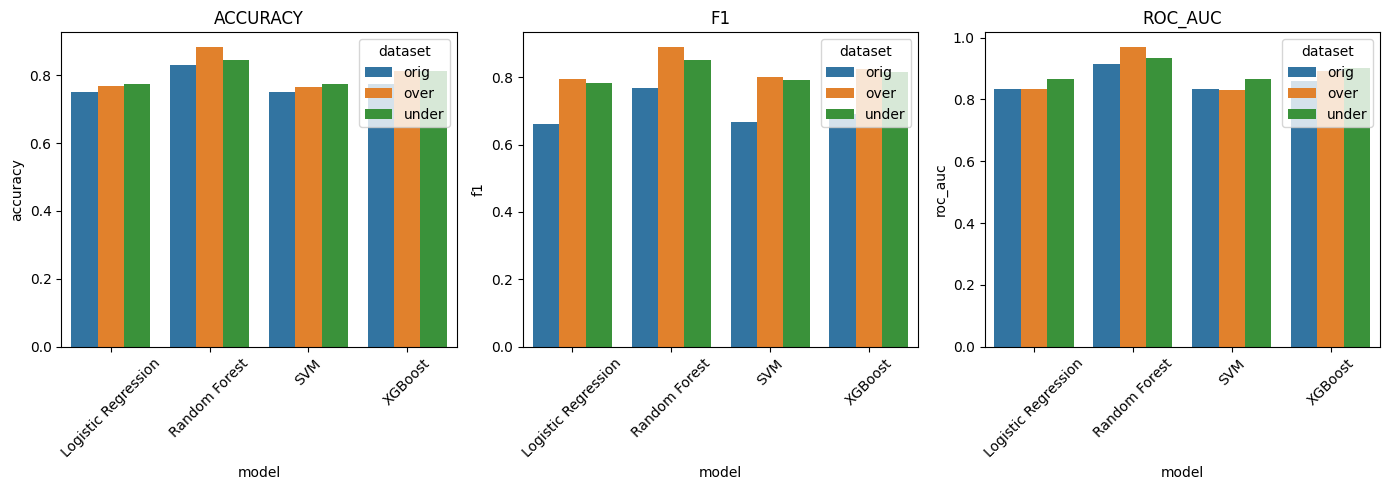

In [17]:
metrics = ["accuracy", "f1", "roc_auc"]

plt.figure(figsize=(14, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(data=df_plot, x="model", y=metric, hue="dataset")
    plt.title(metric.upper())
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Random Forest with oversampled data shows the best performance in all three metrics.

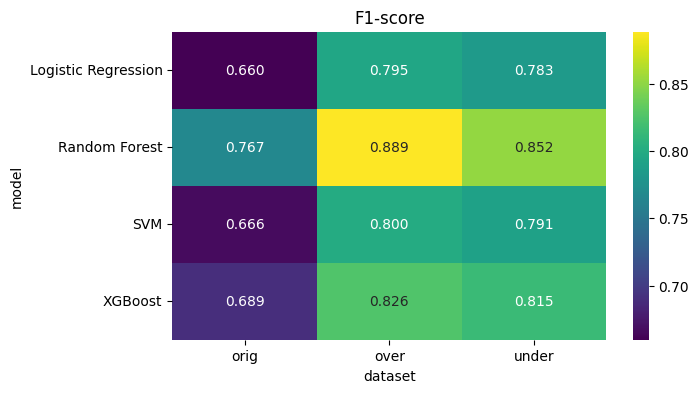

In [18]:
pivot_f1 = df_plot.pivot(index="model", columns="dataset", values="f1")

plt.figure(figsize=(7, 4))
sns.heatmap(pivot_f1, annot=True, cmap="viridis", fmt=".3f")
plt.title("F1-score")
plt.show()

The same observation is confirmed on the heatmap.

The best-performing model is identified by sorting all results by F1-score. The model name, dataset type and corresponding F1-score are  displayed below.

In [19]:
best_row = results_all.sort_values(by="f1", ascending=False).iloc[0]

best_model_name = best_row.name
best_dataset = best_row["dataset"]
best_f1 = best_row["f1"]

print(f"Model: {best_model_name}")
print(f"Metoda: {best_dataset}")
print(f"F1-score: {best_f1:.4f}")

Model: Random Forest
Metoda: over
F1-score: 0.8887


## Experiments

Random Forest trained on the oversampled dataset is selected as the best model. The following experiments will focus on this model to further optimize its performance and improve prediction accuracy.

A function is defined to train a given model on the training set and evaluate it on the test set.

In [20]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)[:, 1]
    else:
        proba = model.decision_function(X_test)  
    return {
        "accuracy": accuracy_score(y_test, preds),
        "f1": f1_score(y_test, preds),
        "roc_auc": roc_auc_score(y_test, proba)
    }

A function is defined to test the effect of a single hyperparameter on Random Forest performance. For each value in the provided list a model is trained on the oversampled dataset. It is then evaluated and the results are stored in a DataFrame for comparison.

In [23]:
def test_param(values, param_name):
    rows = []
    for val in values:
        print(f"Param: {param_name} = {val}")
        params = {param_name: val}
        if param_name == "n_estimators":
            model = RandomForestClassifier(
                random_state=42,
                **params
            )
        else:
            model = RandomForestClassifier(
                n_estimators=200,
                random_state=42,
                **params
            )
        metrics = evaluate_model(model, X_over_train, y_over_train, X_over_test, y_over_test)
        metrics[param_name] = val
        rows.append(metrics)
    return pd.DataFrame(rows)

Different values of the number of trees in the Random Forest are tested to see their impact on model performance.

In [24]:
n_values = [50, 100, 150, 200, 250, 300]
result_n = test_param(n_values, "n_estimators")
display(result_n.sort_values("f1", ascending=False))

Param: n_estimators = 50
Param: n_estimators = 100
Param: n_estimators = 150
Param: n_estimators = 200
Param: n_estimators = 250
Param: n_estimators = 300


,accuracy,f1,roc_auc,n_estimators
3,0.884868,0.891466,0.969635,200
2,0.884511,0.891106,0.969447,150
4,0.883796,0.890609,0.969759,250
5,0.883581,0.890341,0.969818,300
1,0.882866,0.889384,0.968997,100
0,0.883152,0.889340,0.967495,50


An `n_estimators` value of 200 gives the best F1-score of 0.8915 and high ROC AUC.

Different values of the maximum depth of trees in the Random Forest are tested to evaluate their effect on model performance.

In [25]:
depth_values = [5, 10, 15, 20, None]
result_depth = test_param(depth_values, "max_depth")
display(result_depth.sort_values("f1", ascending=False))

Param: max_depth = 5
Param: max_depth = 10
Param: max_depth = 15
Param: max_depth = 20
Param: max_depth = None


,accuracy,f1,roc_auc,max_depth
4,0.884868,0.891466,0.969635,NaN
3,0.870495,0.880454,0.962408,20.0
2,0.832237,0.850134,0.932362,15.0
1,0.785612,0.815212,0.870752,10.0
0,0.761156,0.797698,0.823955,5.0


Allowing unlimited tree depth yields the best F1-score of 0.8915 and high ROC AUC, indicating that deeper trees better capture patterns.

Different settings for the number of features considered when splitting a node are tested to see how they affect Random Forest performance.

In [26]:
feat_values = ["sqrt", "log2", None]
result_feat = test_param(feat_values, "max_features")
display(result_feat.sort_values("f1", ascending=False))

Param: max_features = sqrt
Param: max_features = log2
Param: max_features = None


,accuracy,f1,roc_auc,max_features
0,0.884868,0.891466,0.969635,sqrt
1,0.884868,0.891466,0.969635,log2
2,0.881007,0.887552,0.966604,None


Using either "sqrt" or "log2" for max_features achieves the highest F1-score of 0.8915 and ROC AUC, while considering all features slightly decreases performance.

Different values for the `criterion` parameter, which determines the function used to measure the quality of splits in the Random Forest, are tested on the oversampled dataset.

In [27]:
crit_values = ["gini", "entropy"]
result_crit = test_param(crit_values, "criterion")
display(result_crit.sort_values("f1", ascending=False))

Param: criterion = gini
Param: criterion = entropy


,accuracy,f1,roc_auc,criterion
0,0.884868,0.891466,0.969635,gini
1,0.883724,0.890652,0.969825,entropy


Using the `gini` criterion results in the highest F1-score of 0.8915, slightly outperforming `entropy`.

A function is defined to perform a grid search over multiple hyperparameters of Random Forest. It generates all combinations of the best provided parameter values, then trains and evaluates a model for each combination on the oversampled dataset.

In [28]:
from itertools import product

def test_grid(param_grid):
    keys = list(param_grid.keys())
    all_combinations = list(product(*param_grid.values()))
    rows = []
    for combo in all_combinations:
        params = dict(zip(keys, combo))
        print("Params:", params)
        model = RandomForestClassifier(
            random_state=42,
            **params
        )
        metrics = evaluate_model(model, X_over_train, y_over_train, X_over_test, y_over_test)
        for k, v in params.items():
            metrics[k] = v
        rows.append(metrics)
    return pd.DataFrame(rows)

All possible combinations of the selected hyperparameters are tested to find the optimal Random Forest configuration. The parameters include:

- `n_estimators`: number of trees in the forest (150 or 200),
- `max_depth`: maximum depth of each tree (`None` for unlimited depth or 20),
- `max_features`: number of features considered for each split (`sqrt` or `log2`),
- `criterion`: function to measure the quality of splits (`gini` or `entropy`).

In [29]:
param_grid = {
    "n_estimators": [150, 200],
    "max_depth": [None, 20],
    "max_features": ["sqrt", "log2"],
    "criterion": ["gini", "entropy"]
}

grid_results = test_grid(param_grid)
display(grid_results.sort_values("f1", ascending=False))

Params: {'n_estimators': 150, 'max_depth': None, 'max_features': 'sqrt', 'criterion': 'gini'}
Params: {'n_estimators': 150, 'max_depth': None, 'max_features': 'sqrt', 'criterion': 'entropy'}
Params: {'n_estimators': 150, 'max_depth': None, 'max_features': 'log2', 'criterion': 'gini'}
Params: {'n_estimators': 150, 'max_depth': None, 'max_features': 'log2', 'criterion': 'entropy'}
Params: {'n_estimators': 150, 'max_depth': 20, 'max_features': 'sqrt', 'criterion': 'gini'}
Params: {'n_estimators': 150, 'max_depth': 20, 'max_features': 'sqrt', 'criterion': 'entropy'}
Params: {'n_estimators': 150, 'max_depth': 20, 'max_features': 'log2', 'criterion': 'gini'}
Params: {'n_estimators': 150, 'max_depth': 20, 'max_features': 'log2', 'criterion': 'entropy'}
Params: {'n_estimators': 200, 'max_depth': None, 'max_features': 'sqrt', 'criterion': 'gini'}
Params: {'n_estimators': 200, 'max_depth': None, 'max_features': 'sqrt', 'criterion': 'entropy'}
Params: {'n_estimators': 200, 'max_depth': None, 'max

,accuracy,f1,roc_auc,n_estimators,max_depth,max_features,criterion
10,0.884868,0.891466,0.969635,200,NaN,log2,gini
8,0.884868,0.891466,0.969635,200,NaN,sqrt,gini
0,0.884511,0.891106,0.969447,150,NaN,sqrt,gini
2,0.884511,0.891106,0.969447,150,NaN,log2,gini
1,0.883939,0.890788,0.969622,150,NaN,sqrt,entropy
3,0.883939,0.890788,0.969622,150,NaN,log2,entropy
11,0.883724,0.890652,0.969825,200,NaN,log2,entropy
9,0.883724,0.890652,0.969825,200,NaN,sqrt,entropy
12,0.870495,0.880454,0.962408,200,20.0,sqrt,gini
14,0.870495,0.880454,0.962408,200,20.0,log2,gini


The grid search shows that the best F1-score of 0.8915 is achieved with 200 trees, unlimited depth, max_features set to either `sqrt` or `log2` and the `gini` criterion. Limiting the tree depth to 20 reduces performance, as does using fewer trees or the `entropy` criterion.

The best Random Forest configuration from the grid search is selected by sorting all results by F1-score.

In [30]:
best = grid_results.sort_values("f1", ascending=False).iloc[0]
print("Best config:\n", best)

Best config:
 accuracy        0.884868
f1              0.891466
roc_auc         0.969635
n_estimators         200
max_depth            NaN
max_features        log2
criterion           gini
Name: 10, dtype: object


The optimal Random Forest configuration uses 200 trees, unlimited depth, `max_features` set to `log2`, and the `gini` criterion. This setup achieves an F1-score of 0.8915 and a ROC AUC of 0.9696.

# Conclusions

Among basic classifiers, Random Forest consistently outperformed Logistic Regression, SVM, and XGBoost across all datasets. It worked best with oversampling method to improve F1-score and ROC AUC (that was working best with all models compared to the original and undersampled datasets).

Hyperparameter tuning of Random Forest showed:
- 200 trees have the best result,
- unlimited depth outperformed shallower trees,
- `max_features` set to `sqrt` or `log2` yelded similar top performance,
- `criterion=gini` outperformed `entropy`.

The best overall model is Random Forest trained on the oversampled dataset with tuned parameters.